# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# Intial Imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Accessing the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Reading the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculating the sum number of dwelling types units per year 
number_of_dwelling = (to_data
                      .groupby(["year"])[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']]
                      .sum().reset_index()
                     )
number_of_dwelling

year  single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
0  2001                 300930                       355015                75   
1  2006                 266860                       379400               165   
2  2011                 274940                       429220               100   
3  2016                 269680                       493270                95   

   semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
0                90995      52355   23785                       116900   
1                69430      54690   44095                       162850   
2                72480      60355   44750                       163895   
3                71200      61565   48585                       165575   

   other_house  
0         3040  
1         1335  
2         2165  
3         2845

In [5]:
# Saveing the dataframe as a csv file
number_of_dwelling.to_csv('dwelling_type_per_year.csv') 


### Plotting bar charts to display dwelling types in Neighbourhoods per year.

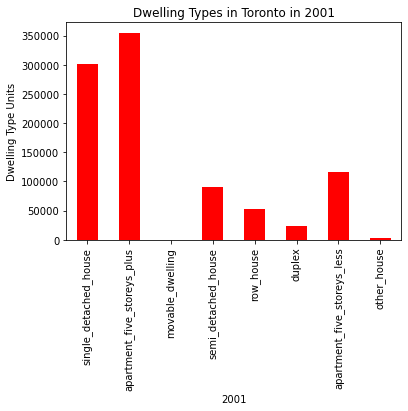

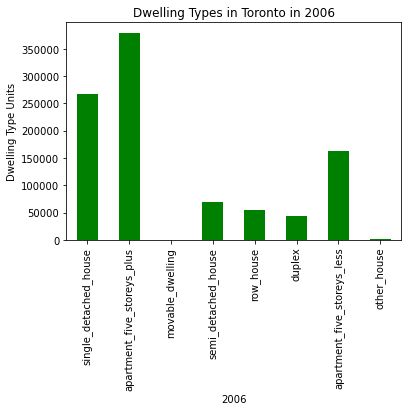

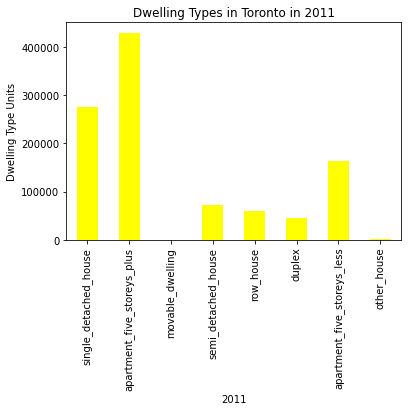

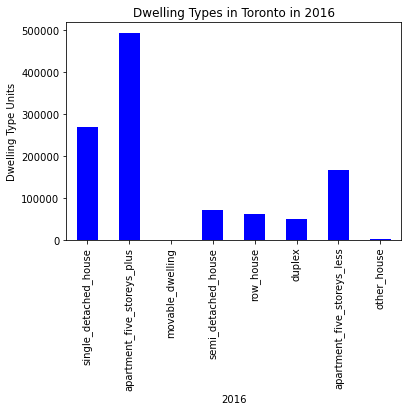

In [6]:

# Bar chart for 2001
dwelling_2001 = number_of_dwelling[number_of_dwelling['year'] == 2001]
dwelling_2001.set_index('year', inplace=True)
dwelling_2001 = dwelling_2001.T

plot_2001 = dwelling_2001.plot.bar(title="Dwelling Types in Toronto in 2001", 
                       legend=False, 
                       xlabel="2001",
                       ylabel="Dwelling Type Units",
                       color="red"
                      )
        

                       
# Bar chart for 2006
dwelling_2006 = number_of_dwelling[number_of_dwelling['year'] == 2006]
dwelling_2006.set_index('year', inplace=True)
dwelling_2006 = dwelling_2006.T

plot_2006 = dwelling_2006.plot.bar(title="Dwelling Types in Toronto in 2006", 
                       legend=False, 
                       xlabel="2006",
                       ylabel="Dwelling Type Units",
                       color="green",
                       
                      )

# Bar chart for 2011
dwelling_2011 = number_of_dwelling[number_of_dwelling['year'] == 2011]
dwelling_2011.set_index('year', inplace=True)
dwelling_2011 = dwelling_2011.T

plot_2011 = dwelling_2011.plot.bar(title="Dwelling Types in Toronto in 2011", 
                       legend=False, 
                       xlabel="2011",
                       ylabel="Dwelling Type Units",
                       color="yellow"
                       
                      )

# Bar chart for 2016
dwelling_2016 = number_of_dwelling[number_of_dwelling['year'] == 2016]
dwelling_2016.set_index('year', inplace=True)
dwelling_2016 = dwelling_2016.T

plot_2016 = dwelling_2016.plot.bar(title="Dwelling Types in Toronto in 2016", 
                       legend=False, 
                       xlabel="2016",
                       ylabel="Dwelling Type Units",
                       color="blue"
                       
                      )

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculating the average monthly shelter costs for owned and rented dwellings
avg_dwelling_cost = (to_data
                      .groupby(["year"])[['shelter_costs_owned','shelter_costs_rented']]
                      .mean()
                     )
avg_dwelling_cost

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [8]:
# Creating two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
owned_plot = avg_dwelling_cost.hvplot(title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", 
                       yformatter="%.0f",
                       y="shelter_costs_owned",         
                       xlabel="Year",
                       ylabel="Avg Monthly Shelter Costs",
                       color="brown"
                      )

# Line chart for rented dwellings
rented_plot = avg_dwelling_cost.hvplot(title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", 
                       yformatter="%.0f",
                       y="shelter_costs_rented",         
                       xlabel="Year",
                       ylabel="Avg Monthly Shelter Costs",
                       color="purple"
                      )
combined_line = owned_plot + rented_plot
combined_line

:Layout
   .Curve.I  :Curve   [year]   (shelter_costs_owned)
   .Curve.II :Curve   [year]   (shelter_costs_rented)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [9]:
# Calculating the average house value per year
avg_house_value = (to_data
                      .groupby(["year"])[['average_house_value']]
                      .mean()
                     )
avg_house_value

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

In [10]:
# Plotting the average house value per year as a line chart
avg_value_plot = avg_house_value.hvplot(title="Average House Value in Toronto", 
                       legend=False,         
                       xlabel="Year",
                       ylabel="Avg House Value",
                       yformatter="%.0f",
                       color="orange"
                      )
avg_value_plot

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [11]:
# Creating a new DataFrame with the mean house values by neighbourhood per year


neighbourhood_value_by_year = (to_data.groupby(['year', 'neighbourhood'])[['average_house_value']]
                      .mean().reset_index()
                     )
neighbourhood_value_by_year.head()

year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864

In [12]:
# Using hvplot to create an interactive line chart of the average house value per neighbourhood
average_value_plot = neighbourhood_value_by_year.hvplot(
                             x="year",
                             groupby='neighbourhood',
                             widget_location='right_top',
                             yformatter="%.0f",
                       legend=False,         
                       xlabel="Year",
                       ylabel="Avg House Value",
                       color="orange"
                      )
average_value_plot

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] VSpacer()

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [13]:
# Fetching the data of all dwelling types per year
# Calculating the sum number of dwelling types units per year 

neighbourhood_dwelling = (to_data
                      .groupby(["year", "neighbourhood"])[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']]
                      .sum().reset_index()
                     )
neighbourhood_dwelling.head()


year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  
0       1295     195                          185            5  
1        455     105                          425            0  
2         50     185                          370            0  
3        605     275                         3710          165  
4        380      15                         1360            0

In [14]:
# Using hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood

neighbourhood_dwelling_types = neighbourhood_dwelling.hvplot(
                             kind='bar',
                             height=600,   
                             x="year",
                             rot=90,
                             groupby='neighbourhood',
                             widget_location='right_top',        
                       xlabel="Year",
                       ylabel="Avg House Value",
                      )
neighbourhood_dwelling_types

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] VSpacer()

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [15]:
# Getting the data from the top 10 expensive neighbourhoods

top_10 = neighbourhood_value_by_year.sort_values(ascending=False, by='average_house_value').drop(columns=['year'])
top_10 = top_10.reset_index().drop(columns=['index'])
top_10.head(10)

neighbourhood  average_house_value
0  Bridle Path-Sunnybrook-York Mills              2124653
1  Bridle Path-Sunnybrook-York Mills              1697067
2                  Forest Hill South              1664653
3                Lawrence Park South              1522732
4                Rosedale-Moore Park              1522193
5               St.Andrew-Windfields              1390616
6                          Casa Loma              1365503
7  Bridle Path-Sunnybrook-York Mills              1356757
8                  Forest Hill South              1329642
9               Bedford Park-Nortown              1295007

In [16]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_plot = top_10.head(10).hvplot.bar(x='neighbourhood',
                                         rot=90,
                                         title='Top 10 Expensive Neighbourhood in Toronto',
                                         yformatter="%.0f",
                                         height=500)

top_10_plot

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [17]:
# Loading the neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [18]:
# Calculating the mean values for each neighborhood
mean_value_neighbourhood =  (to_data.groupby(["neighbourhood"])[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','average_house_value','shelter_costs_owned','shelter_costs_rented']]
                      .mean().reset_index()
                     )
mean_value_neighbourhood

neighbourhood  single_detached_house  \
0                 Agincourt North                3435.00   
1    Agincourt South-Malvern West                2897.50   
2                       Alderwood                2903.75   
3                           Annex                 751.25   
4               Banbury-Don Mills                3572.50   
..                            ...                    ...   
135                      Wychwood                1056.25   
136                Yonge-Eglinton                1468.75   
137                Yonge-St.Clair                 565.00   
138       York University Heights                1355.00   
139            Yorkdale-Glen Park                2286.25   

     apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                        1947.50              2.50               863.75   
1                        2180.00              1.25               375.00   
2                         302.50              1.25               503.75   
3                        7235.00              1.25              1375.00   
4                        5388.75              1.25               273.75   
..                           ...               ...                  ...   
135                      1236.25              0.00               992.50   
136                      1638.75              0.00               470.00   
137                      3948.75              0.00               425.00   
138                      5165.00              1.25              1316.25   
139                      1347.50              0.00                73.75   

     row_house  duplex  apartment_five_storeys_less  other_house  \
0      1406.25  512.50                       547.50        10.00   
1       456.25  523.75                       628.75        32.50   
2        76.25  302.50                       502.50         1.25   
3       613.75  355.00                      4605.00        83.75   
4       626.25   32.50                      1340.00         0.00   
..         ...     ...                          ...          ...   
135     298.75  325.00                      1878.75        17.50   
136      33.75  328.75                      1385.00         6.25   
137     212.50  172.50                      1308.75         6.25   
138     662.50  188.75                      1085.00        33.75   
139     450.00  377.50                       722.50         7.50   

     average_house_value  shelter_costs_owned  shelter_costs_rented  
0              329811.50              1109.00                983.50  
1              334189.00              1131.25                985.00  
2              427922.50              1166.75               1003.25  
3              746977.00              1692.75               1315.25  
4              612039.00              1463.50               1242.75  
..                   ...                  ...                   ...  
135            565976.50              1390.75               1017.25  
136            809745.75              1799.50               1347.75  
137            813220.25              1680.75               1369.00  
138            305899.50              1116.75                937.50  
139            430861.25              1122.50                942.50  

[140 rows x 12 columns]

In [19]:
# Merging the average values with the neighbourhood locations 

combined_df = pd.concat([df_neighbourhood_locations, 
                         mean_value_neighbourhood.loc[:,mean_value_neighbourhood.columns != 'neighbourhood']], 
                        axis=1)
combined_df

neighbourhood        lat        lon  \
0                 Agincourt North  43.805441 -79.266712   
1    Agincourt South-Malvern West  43.788658 -79.265612   
2                       Alderwood  43.604937 -79.541611   
3                           Annex  43.671585 -79.404001   
4               Banbury-Don Mills  43.737657 -79.349718   
..                            ...        ...        ...   
135                      Wychwood  43.676919 -79.425515   
136                Yonge-Eglinton  43.704689 -79.403590   
137                Yonge-St.Clair  43.687859 -79.397871   
138       York University Heights  43.765736 -79.488883   
139            Yorkdale-Glen Park  43.714672 -79.457108   

     single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
0                  3435.00                      1947.50              2.50   
1                  2897.50                      2180.00              1.25   
2                  2903.75                       302.50              1.25   
3                   751.25                      7235.00              1.25   
4                  3572.50                      5388.75              1.25   
..                     ...                          ...               ...   
135                1056.25                      1236.25              0.00   
136                1468.75                      1638.75              0.00   
137                 565.00                      3948.75              0.00   
138                1355.00                      5165.00              1.25   
139                2286.25                      1347.50              0.00   

     semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
0                 863.75    1406.25  512.50                       547.50   
1                 375.00     456.25  523.75                       628.75   
2                 503.75      76.25  302.50                       502.50   
3                1375.00     613.75  355.00                      4605.00   
4                 273.75     626.25   32.50                      1340.00   
..                   ...        ...     ...                          ...   
135               992.50     298.75  325.00                      1878.75   
136               470.00      33.75  328.75                      1385.00   
137               425.00     212.50  172.50                      1308.75   
138              1316.25     662.50  188.75                      1085.00   
139                73.75     450.00  377.50                       722.50   

     other_house  average_house_value  shelter_costs_owned  \
0          10.00            329811.50              1109.00   
1          32.50            334189.00              1131.25   
2           1.25            427922.50              1166.75   
3          83.75            746977.00              1692.75   
4           0.00            612039.00              1463.50   
..           ...                  ...                  ...   
135        17.50            565976.50              1390.75   
136         6.25            809745.75              1799.50   
137         6.25            813220.25              1680.75   
138        33.75            305899.50              1116.75   
139         7.50            430861.25              1122.50   

     shelter_costs_rented  
0                  983.50  
1                  985.00  
2                 1003.25  
3                 1315.25  
4                 1242.75  
..                    ...  
135               1017.25  
136               1347.75  
137               1369.00  
138                937.50  
139                942.50  

[140 rows x 14 columns]

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

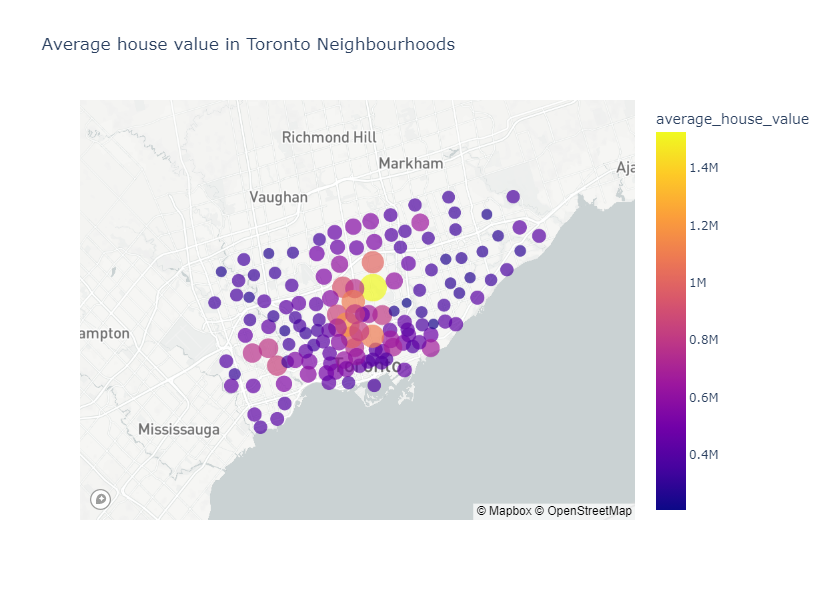

In [20]:
# Creating a scatter mapbox to analyze neighbourhood infomation
map_plot = px.scatter_mapbox(
    
    combined_df,
    lat="lat",
    lon = 'lon',
    color = 'average_house_value',
    size = 'average_house_value',
    hover_name = 'neighbourhood',
    title='Average house value in Toronto Neighbourhoods',
    height = 600,
    zoom = 9
    
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

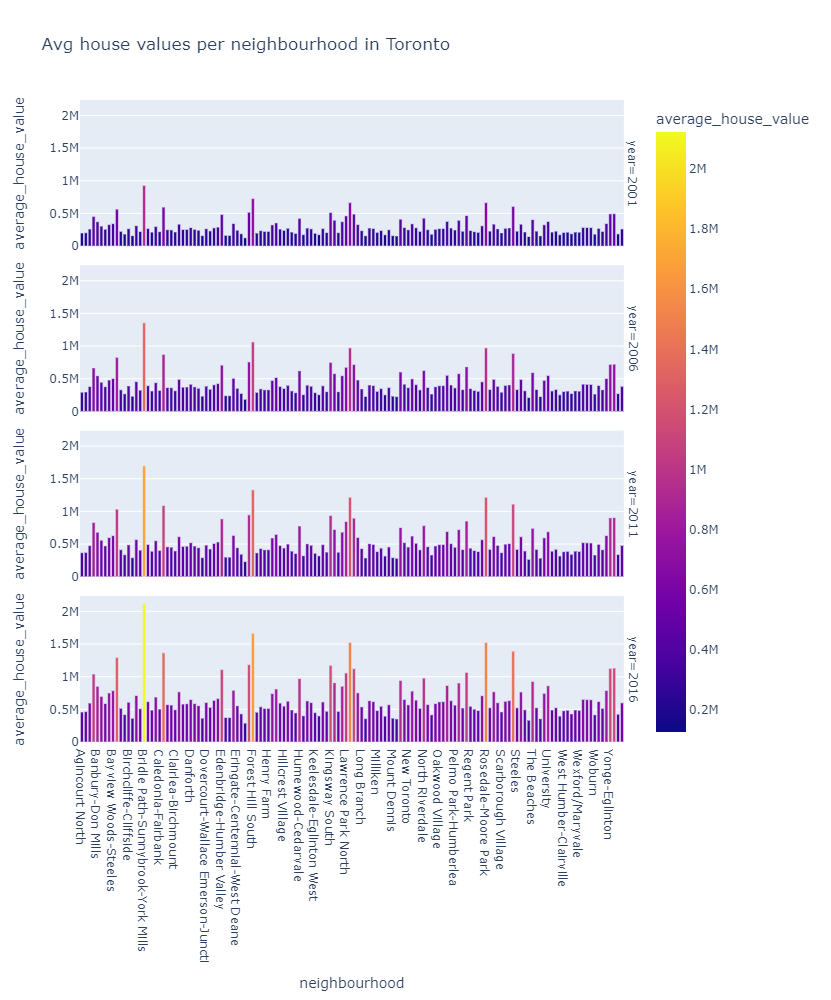

In [21]:
# Bar Chart Row Facet
facet_row = px.bar(neighbourhood_value_by_year, color="average_house_value",
                   title='Avg house values per neighbourhood in Toronto',
             y="average_house_value", x="neighbourhood", facet_row="year", height=1000)
facet_row.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [22]:
# Fetching the data from all expensive neighbourhoods per year.
top_neighbourhoods_per_year = neighbourhood_value_by_year.sort_values(ascending=False, by='average_house_value')
top_neighbourhoods_per_year

year                      neighbourhood  average_house_value
436  2016  Bridle Path-Sunnybrook-York Mills              2124653
296  2011  Bridle Path-Sunnybrook-York Mills              1697067
464  2016                  Forest Hill South              1664653
489  2016                Lawrence Park South              1522732
524  2016                Rosedale-Moore Park              1522193
..    ...                                ...                  ...
73   2001                            Malvern               156076
118  2001                   Thorncliffe Park               155094
81   2001  Mount Olive-Silverstone-Jamestown               153829
115  2001                      Taylor-Massey               145464
42   2001                    Flemingdon Park               126255

[560 rows x 3 columns]

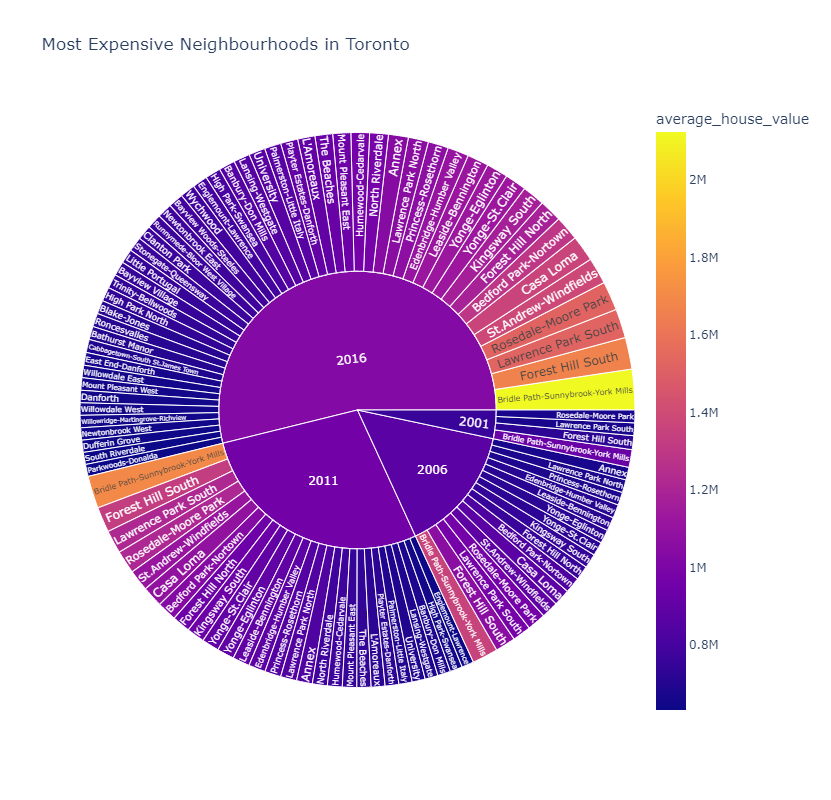

In [23]:
# Creating the sunburst chart of top 100 expensive neighbourhoods in toronto
df_sunburst = px.sunburst(top_neighbourhoods_per_year.head(100), path=['year', 'neighbourhood'], values='average_house_value', 
                          color='average_house_value', 
                          title='Most Expensive Neighbourhoods in Toronto', height=800)
df_sunburst.show()